In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def readData(filename):
    f = open(filename)
    ret=[]
    for each_line in f.readlines():
        data_arr=each_line.strip().split(",")
        temp=[]
        for i in range(len(data_arr)):
            temp.append(float(data_arr[i]))
        ret.append(temp)
    return np.array(ret)
#绘制散点图
def draw_initData(x,y):
    label0=np.where(y.ravel()==0)
    plt.scatter(x[label0,0],x[label0,1],marker="x",color="r")
    label1=np.where(y.ravel()==1)
    plt.scatter(x[label1,0],x[label1,1],marker='o',color="b")
#升维操作 变为非线性判别区域
def Upscale(x,degree):
    m,n=x.shape
    ret=np.ones([m,1])
    x1,x2=x[:,0],x[:,1]
    for i in range(1,degree+1):
        for j in range(0,i+1):
            temp = x1**(i-j) * x2**(j)
            ret = np.hstack([ret,temp.reshape([-1,1])])
    return ret
    
def sigmoid(x):
    return 1/(1+np.exp(-x))

def h(theta,x):
    return sigmoid(np.dot(x,theta))

def cost(theta,x,y):
    return (-y.T@np.log(h(theta,x))-(1-y.T)@np.log(1-h(theta,x)))/x.shape[0]
def grad(theta,x,y):
    return X.T@(h(theta,x)-y)/x.shape[0]
def predict(X,theta):
    H = h(theta,X)
    y_pred = np.where(H>=0.5,1.0,0)
    return y_pred 

In [3]:
data=readData("ex2data2.txt")
x=data[:,:-1]
y=data[:,-1:]

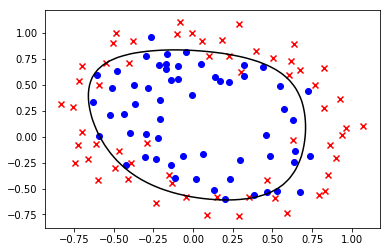

accuracy:0.8220338983050848


In [4]:
m=x.shape[0]
degree=6
X=Upscale(x,degree)
n=X.shape[1]
a=0.3
max_iter=1000
degree=6
theta=np.zeros([n,1])
J=[]
#计算代价函数与更新参数
for iters in range(max_iter):
    J.append(cost(theta,X,y).ravel())
    theta=0.995*theta-a*grad(theta,X,y)
draw_initData(x,y)
#绘制等高线图
poly = PolynomialFeatures(degree)
x1Min = X[:, 1].min()
x1Max = X[:, 1].max()
x2Min = X[:, 2].min()
x2Max = X[:, 2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1Min, x1Max),np.linspace(x2Min, x2Max))
contour = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta)) #boundary
contour = contour.reshape(xx1.shape)
plt.contour(xx1, xx2, contour, [0.5], colors='black')
plt.show()
p = predict(X,theta)
print ("accuracy:"+str(np.mean(p==y)))

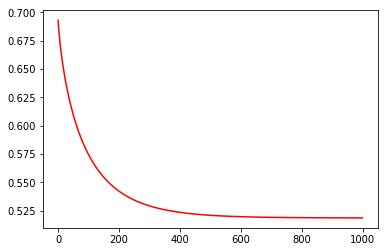

In [5]:
plt.plot(J,'r')